In [1]:
from tools import *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import time

In [2]:
mpt = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\', data = ['DE_49_9_30.mpt'], mask = [10**6,10**1])
print(len(mpt.df[0]))
#print(mpt.low_error)

100


Beginning to fit  DE_140_16_30.mpt ...
No handles with labels found to put in legend.


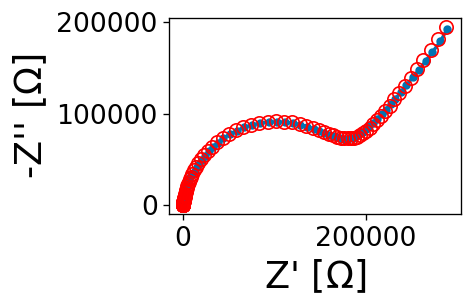

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_R2,fit_n2,fit_fs2,fit_Q2,fit_Q3,fit_n3
0,DE_49_9_30.mpt,1.174201,14544.951158,0.620852,NaN,0.000961,159087.510781,0.968089,NaN,2.229136e-09,3.291075e-07,0.622702


In [3]:
mpt.guesser()

No handles with labels found to put in legend.


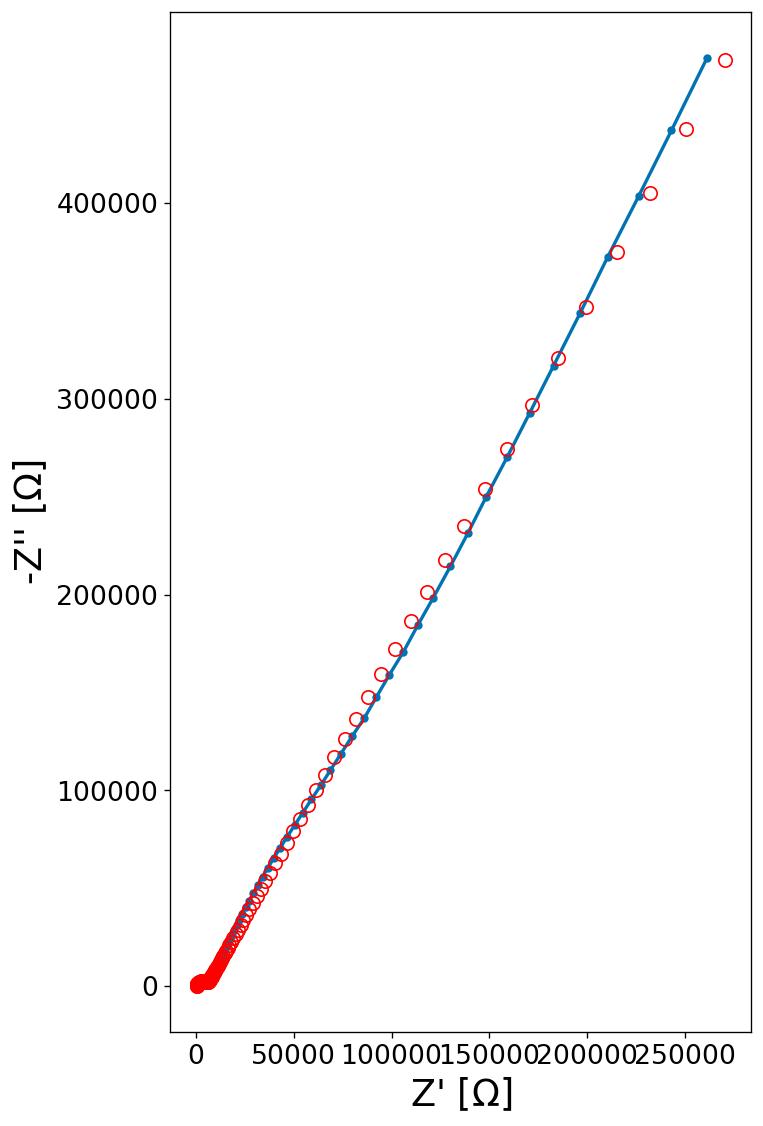

28.715486764907837


In [3]:
import time

start = time.time()

#EXPERIMENTATION FOR THE AUTOMATION
#TAKES A WHILE TO FIT THOUGH
self = mpt_data(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\', data = ['DE_104_1_30.mpt'])
init_guesses = []
param_list = []
for i in range(1000):
    Rs_guess = min(self.df[0]['re'])
    R1_guess = max(self.df[0]['re'])//4
    n1_guess = random.uniform(0, 1)
    q1_guess = random.uniform(0, .001)
    R2_guess = 2*max(self.df[0]['re'])//4
    n2_guess = random.uniform(0, 1)
    q2_guess = random.uniform(0, .001)
    Q3_guess = random.uniform(0, .001)
    n3_guess = random.uniform(0, 1)
    params = Parameters()
    params.add('Rs', value=Rs_guess, min=Rs_guess*.001, max=Rs_guess*10)
    params.add('R1', value=R1_guess, min=R1_guess*.001, max=R1_guess*10)
    params.add('n1', value=n1_guess, min=0, max=1)
    #params.add('fs1', value=fs1_guess, min=10**-2, max=10**10)
    params.add('Q1', value=q1_guess, min=0, max=.001)
    params.add('R2', value=R2_guess, min=R2_guess*.001, max=R2_guess*10)
    params.add('n2', value=n2_guess, min=.01, max=1)
    #params.add('fs2', value=fs2_guess, min=fs2_guess**.1, max=10**10)
    params.add('Q2', value=q2_guess, min=0, max=.001)
    params.add('Q', value=Q3_guess, min=0, max=.001)
    params.add('n', value=n3_guess, min=.01, max=1)
    param_list.append(params)
    self.mpt_fit(params, circuit = 'R-RQ-RQ-Q', maxfev = 50)
    init_guesses.append(mpt.low_error)
params = param_list[init_guesses.index(min(init_guesses))]
self.mpt_fit(params, circuit = 'R-RQ-RQ-Q',maxfev = 1000)
#print("THE LOWEST ERROR IS ", mpt.low_error)
self.width = 50
self.height = 25
self.mpt_plot(fitting = 'on')
end = time.time()
print(end - start)

No handles with labels found to put in legend.


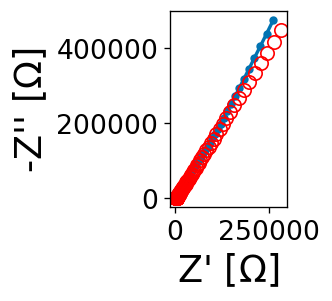

0.26831531524658203


In [3]:
def guesser(self, circuit = 'R-RQ-RQ-Q', csv_container = None, no_of_fits = 5):
        start = time.time()
        if circuit == 'R-RQ-RQ-Q':
            init_guesses = []
            param_list = []
            for i in range(no_of_fits):
                Rs_guess = min(self.df[0]['re'])
                R1_guess = max(self.df[0]['re'])//4
                n1_guess = random.uniform(0, 1)
                q1_guess = random.uniform(0, .001)
                R2_guess = 2*max(self.df[0]['re'])//4
                n2_guess = random.uniform(0, 1)
                q2_guess = random.uniform(0, .001)
                Q3_guess = random.uniform(0, .001)
                n3_guess = random.uniform(0, 1)
                params = Parameters()
                params.add('Rs', value=Rs_guess, min=Rs_guess*.001, max=Rs_guess*10)
                params.add('R1', value=R1_guess, min=R1_guess*.001, max=R1_guess*10)
                params.add('n1', value=n1_guess, min=0, max=1)
                #params.add('fs1', value=fs1_guess, min=10**-2, max=10**10)
                params.add('Q1', value=q1_guess, min=0, max=.001)
                params.add('R2', value=R2_guess, min=R2_guess*.001, max=R2_guess*10)
                params.add('n2', value=n2_guess, min=.01, max=1)
                #params.add('fs2', value=fs2_guess, min=fs2_guess**.1, max=10**10)
                params.add('Q2', value=q2_guess, min=0, max=.001)
                params.add('Q', value=Q3_guess, min=0, max=.001)
                params.add('n', value=n3_guess, min=.01, max=1)
                param_list.append(params)
                self.mpt_fit(params, circuit = 'R-RQ-RQ-Q', maxfev = 10)
                init_guesses.append(self.low_error)
            params = param_list[init_guesses.index(min(init_guesses))]
            self.mpt_fit(params, circuit = 'R-RQ-RQ-Q',maxfev = 100)
            self.mpt_plot(fitting = 'on')
            self.fitted = pd.DataFrame({'file':self.data,
                        'fit_Rs':self.fit_Rs,
                    "fit_R1":self.fit_R1,
                    "fit_n1":self.fit_n1,
                    "fit_fs1":np.nan,
                    "fit_Q1":self.fit_Q1,                   
                    "fit_R2":self.fit_R2,
                    "fit_n2":self.fit_n2,
                    "fit_fs2":np.nan,
                    "fit_Q2":self.fit_Q2,
                    "fit_Q3":self.fit_Q,
                    "fit_n3":self.fit_n,})
            out_name = 'fitted_' + self.data[0][:-4]
            end = time.time()
            #print(end - start)
            if csv_container:
                self.fitted.to_csv(csv_container+out_name, sep='\t')
                return self.fitted
            return self.fitted
        elif circuit == 'R-RQ-Q':
            Rs_guess = min(self.df[0]['re'])
            Q_guess = 10**-5
            n_guess = .5

            R1_guess = max(self.df[0]['re'])//2
            n1_guess = .5
            fs1_guess = 10**3

            params = Parameters()
            params.add('Rs', value=Rs_guess, min=0, max=Rs_guess*1000)

            params.add('Q', value=Q_guess, min=Q_guess*.01, max=Q_guess*100)
            params.add('n', value=n_guess, min=.1, max=1)

            params.add('R1', value=R1_guess, min=Rs_guess, max=R1_guess*100)
            params.add('n1', value=n1_guess, min=.1, max=1)
            params.add('fs1', value=fs1_guess, min=10**0, max=10**10)


            (self.mpt_fit(params, circuit = 'R-RQ-Q', weight_func = 'modulus'))

            counter = 0

            while self.low_error >= 10000 and counter <= 100:  
                try:      
                    counter += 1
                    Rs_guess = self.fit_Rs[0]

                    Q_guess = self.fit_Q[0]
                    n_guess =self.fit_n[0]
                    R1_guess = self.fit_R1[0]
                    n1_guess = self.fit_n1[0]
                    fs1_guess = self.fit_fs1[0]

                    params = Parameters()
                    params.add('Rs', value=Rs_guess, min=0, max=Rs_guess*1000)

                    params.add('Q', value=Q_guess, min=Q_guess*.01, max=Q_guess*100)
                    params.add('n', value=n_guess, min=.1, max=1)

                    params.add('R1', value=R1_guess, min=Rs_guess, max=R1_guess*100)
                    params.add('n1', value=n1_guess, min=.1, max=1)
                    params.add('fs1', value=fs1_guess, min=10**0, max=10**10)

                    #params['Q'].value
                    self.mpt_fit(params=params, circuit='R-RQ-Q', weight_func='modulus')
                except KeyboardInterrupt:
                    print("Interrupted!")
            self.fitted = pd.DataFrame({'file':self.data,
                        'fit_Rs':self.fit_Rs,
                    "fit_R1":self.fit_R1,
                    "fit_n1":self.fit_n1,
                    "fit_fs1":self.fit_fs1,
                    "fit_Q1":(1/(self.fit_R1[0]*(2*np.pi*self.fit_fs1[0])**self.fit_n1[0])),                   
                    "fit_Q":self.fit_Q,
                    "fit_n2":self.fit_n})
            out_name = 'fitted_' + self.data[0][:-4]
            if csv_container:
                self.fitted.to_csv(csv_container+out_name, sep='\t')
                return self.fitted
            return self.fitted
        else:
t *
from lmfit import minimize, Minimizer, Parameters, Parameter, report_fit
import time
path_listing(path = r'C:\Users\cjang.WILDCAT\Desktop\EIS_Manager\data\\')

In [5]:
mpt.guesser()

,file,fit_Rs,fit_R1,fit_n1,fit_fs1,fit_Q1,fit_R2,fit_n2,fit_fs2,fit_Q2,fit_Q3,fit_n3
0,DE_104_1_30.mpt,181.96932,416131.926091,0.436048,NaN,0.008894,6579.374933,0.750292,NaN,1.622312e-08,4.104669e-07,0.728492
